In [65]:
import time
import numpy as np
import torch
from torch import nn

# Foor classes
import inspect 
import matplotlib.pyplot as plt

### Three classes

* **Module**: Contains models, losses, and optimzation methods
* **DataModule**: Data Loaders for training and validation
* **Trainer**: train models on a variety of hardware platforms

In [6]:
class A:
    def __init__(self):
        self.b = 1

    def do(self):
        print (f'Class attribute "b" is {self.b}')


a = A()
a.do()

Class attribute "b" is 1


In [73]:
class HyperParameters:
    '''Parent class to save parameters not ignored'''

    # Save paremeters not ignored to self
    def save_hyperparameters(self, ignore=[]):

        # Get local variables passed to function (a=b,...) -> {a:b,...}
        frame = inspect.currentframe().f_back
        _, _, _, local_vars = inspect.getargvalues(frame)

        # Get parameters not ignored and place in dictionary
        self.hparams = {k: v for k, v in local_vars.items() if k not in
                        set(ignore + ['self']) and not k.startswith('_')}

        # Save parameter values to self. {a:b} -> self.a = b
        for k, v in self.hparams.items():
            setattr(self, k, v)


# Instance of HyperParameters accepting three values
class B(HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print(f'{self.a = }\n{self.b = }')
        print(f"There is no self.c = {not hasattr(self, 'c')}")

class ProgressBoard(HyperParameters):  #@save
    """Plot data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        plt.plot(x, y, label=label)


b = B(a=1, b=2, c=3)


self.a = 1
self.b = 2
There is no self.c = True


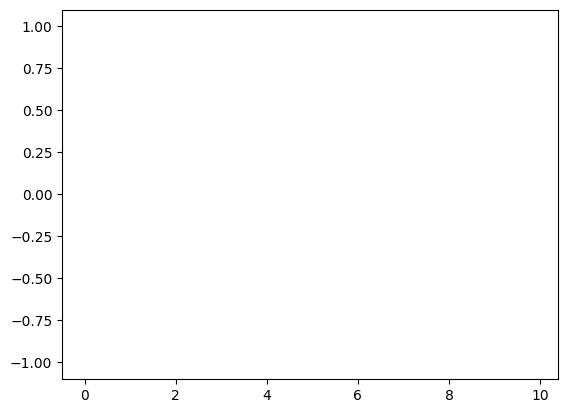

In [74]:
board = ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)